In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

numpy_time_list = []
listas_time_list = []
torch_time_list = []

In [2]:
class LinearRegression:
    
    def __init__(self, n_features):
        self.W = np.random.normal(-1,1,(n_features,1)) #weights
        self.b = np.random.rand(1) #intercept
        
    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W -= learning_rate*delta_W                                                                  
        self.b -= learning_rate*delta_b 
        
    def derivatives(self, X, Y):
        #partial derivative of cost w.r.t the weights
        delta_W = np.sum(np.multiply(((np.matmul(X,self.W)+self.b)-Y), X))*2/X.shape[0] 
        #partial derivative of cost w.r.t the intercept
        delta_b = np.sum(((np.matmul(X,self.W)+self.b)-Y))*2/X.shape[0]                
        return delta_W, delta_b
    
    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        X = np.array(X).reshape(-1,1)
        Y = np.array(Y).reshape(-1,1)

              
        for i in range(epochs):
            
            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate)
            
            
            
        return self.W, self.b

    def predict(self, X):
        print(X.shape, X.reshape(-1,1).shape)
        product = np.matmul(np.array(X).reshape(-1,1),self.W)+self.b
        return product
    
    

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/SLPeoples/Machine-Learning-A-Z/master/Part%2003%20-%20Classification/16_SVM/Social_Network_Ads.csv")
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
# feature engineering?
x = (df['Age']-df['Age'].mean())/df['Age'].std() #standardization of the dataset
y = (df["EstimatedSalary"]-df['EstimatedSalary'].mean())/df["EstimatedSalary"].std()
x.shape, y.shape

((400,), (400,))

In [5]:
reg = LinearRegression(n_features=1)

[0.15523802] 3.665752612863132e-17
(180,) (180, 1)


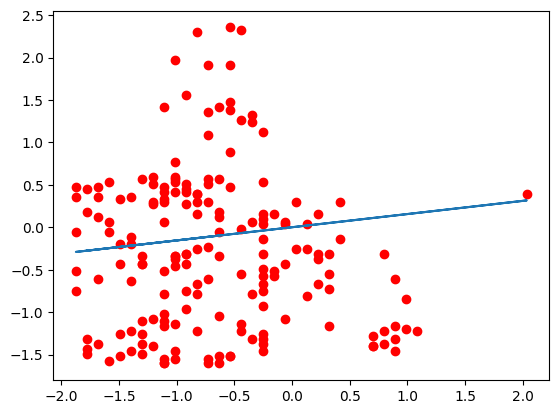

In [6]:
start_time = time.time()
params = reg.train(x, y, epochs=200, learning_rate=0.225)
end_time = time.time()
time_taken_numpy = end_time - start_time
numpy_time_list.append(time_taken_numpy)

print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])

In [7]:
def foo(w, b, n):
    x = np.random.rand(n,1)
    y = np.power(2, (w*x)) + b
    return x, y

x, y = foo(9, 3, 25000)
x.shape, y.shape

((25000, 1), (25000, 1))

In [8]:
reg = LinearRegression(n_features=1)

[333.43211061] -82.0693551091137
(180, 1) (180, 1)


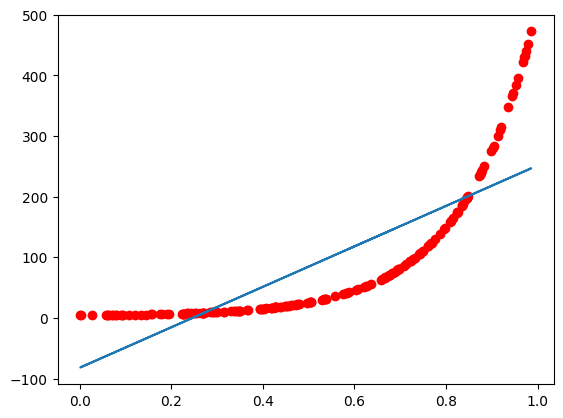

In [9]:

params = reg.train(x, y, epochs=500, learning_rate=0.225)


print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])

In [10]:
import torch


In [11]:
class LinearRegression_Pytorch:

    def __init__(self, n_features):
        self.W = torch.randn(n_features, 1, dtype=torch.double, requires_grad=True)
        self.b = torch.randn(1, dtype=torch.double, requires_grad=True)

    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W.data -= learning_rate*delta_W.data
        self.b.data -= learning_rate*delta_b.data 

    def derivatives(self, X, Y):
        #partial derivative of cost w.r.t the weights
        delta_W = torch.sum(((torch.matmul(X.double(), self.W.double()) + self.b.double()) - Y.double()) * X.double(), dim=0) * 2 / X.shape[0] 
        #partial derivative of cost w.r.t the intercept
        delta_b = torch.sum(((torch.matmul(X.double(), self.W.double()) + self.b.double()) - Y.double()), dim=0) * 2 / X.shape[0]
        return delta_W, delta_b
    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        X = torch.tensor(X, dtype=torch.double).reshape(-1, 1)
        Y = torch.tensor(Y, dtype=torch.double).reshape(-1, 1)

        for i in range(epochs):

            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate)



        return self.W.detach().numpy(), self.b.detach().numpy()

    def predict(self, X):
        X = torch.tensor(X).reshape(-1, 1)
        product = torch.matmul(X, self.W) + self.b
        return product.detach().numpy()

In [12]:
# feature engineering?
x = (df['Age']-df['Age'].mean())/df['Age'].std() #standardization of the dataset
y = (df["EstimatedSalary"]-df['EstimatedSalary'].mean())/df["EstimatedSalary"].std()
x.shape, y.shape

reg2 = LinearRegression_Pytorch(n_features=1)

[0.15523802] 1.7984644184132334e-17


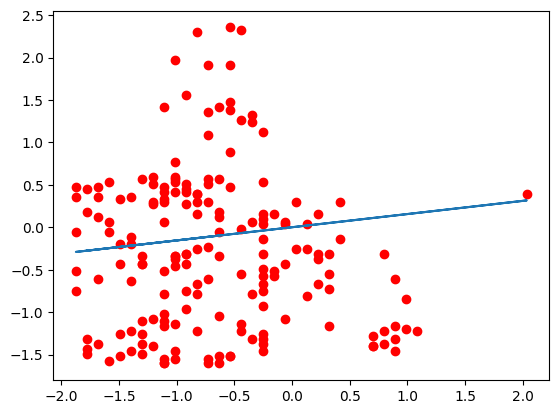

In [13]:
start_time = time.time()
params = reg2.train(x, y, epochs=200, learning_rate=0.225)
end_time = time.time()
time_taken_torch = end_time - start_time
torch_time_list.append(time_taken_torch)

print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg2.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])

In [14]:
class LinearRegression_listas:

    def __init__(self, n_features):
        self.W = torch.randn(n_features, 1, dtype=torch.double, requires_grad=True)
        self.b = torch.randn(1, dtype=torch.double, requires_grad=True)

    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W.data -= learning_rate*delta_W.data
        self.b.data -= learning_rate*delta_b.data 

    def derivatives(self, X, Y):
        #partial derivative of cost w.r.t the weights
        delta_W = torch.sum(((torch.matmul(X.double(), self.W.double()) + self.b.double()) - Y.double()) * X.double(), dim=0) * 2 / X.shape[0] 
        #partial derivative of cost w.r.t the intercept
        delta_b = torch.sum(((torch.matmul(X.double(), self.W.double()) + self.b.double()) - Y.double()), dim=0) * 2 / X.shape[0]
        return delta_W, delta_b
    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        X = torch.tensor(X, dtype=torch.double).reshape(-1, 1)
        Y = torch.tensor(Y, dtype=torch.double).reshape(-1, 1)

        for i in range(epochs):

            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate)



        return self.W.detach().numpy(), self.b.detach().numpy()

    def predict(self, X):
        X = torch.tensor(X).reshape(-1, 1)
        product = torch.matmul(X, self.W) + self.b
        return product.detach().numpy()

In [15]:
# feature engineering?
x = (df['Age']-df['Age'].mean())/df['Age'].std() #standardization of the dataset
y = (df["EstimatedSalary"]-df['EstimatedSalary'].mean())/df["EstimatedSalary"].std()
x.shape, y.shape

reg3 = LinearRegression_listas(n_features=1)

[0.15523802] 2.146050607285225e-17


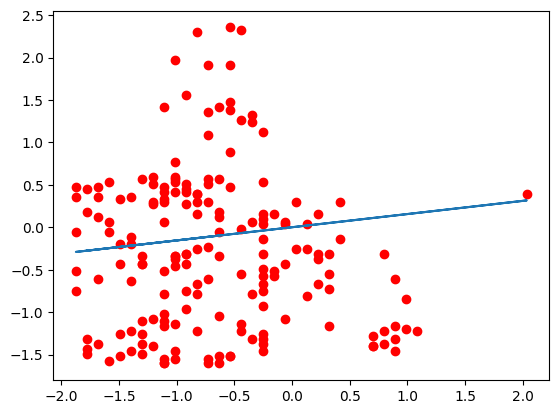

In [16]:
start_time = time.time()
params = reg3.train(x, y, epochs=200, learning_rate=0.225)
end_time = time.time()
time_taken_listas = end_time - start_time
listas_time_list.append(time_taken_listas)

print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg3.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])

In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")
df.head(10)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [18]:
# feature engineering?
x = (df['Age']-df['Age'].mean())/df['Age'].std() #standardization of the dataset
y = (df["EstimatedSalary"]-df['EstimatedSalary'].mean())/df["EstimatedSalary"].std()
x.shape, y.shape

((400,), (400,))

[0.15523802] 3.08252812044766e-17
(180,) (180, 1)


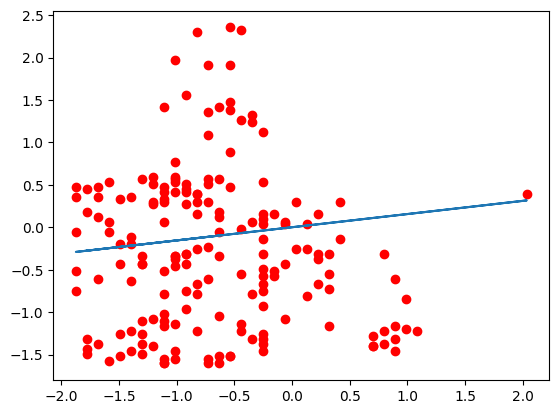

In [19]:
start_time = time.time()
params = reg.train(x, y, epochs=200, learning_rate=0.225)
end_time = time.time()
time_taken_numpy2 = end_time - start_time
numpy_time_list.append(time_taken_numpy2)

print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])

[0.15523802] 2.0982246350620256e-17


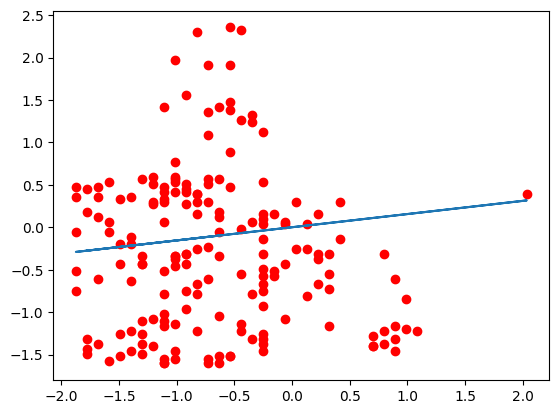

In [20]:
start_time = time.time()
params = reg2.train(x, y, epochs=200, learning_rate=0.225)
end_time = time.time()
time_taken_torch2 = end_time - start_time
torch_time_list.append(time_taken_torch2)

print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg2.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])

[0.15523802] 2.046130535068961e-17


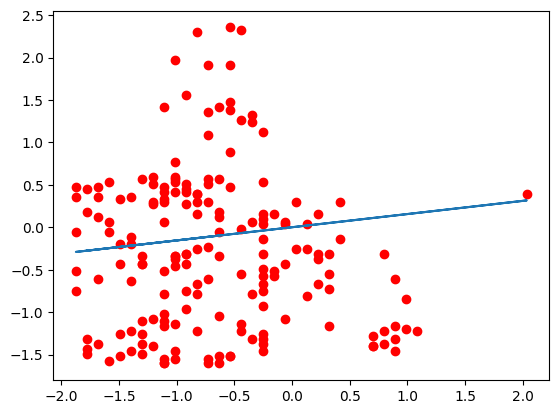

In [21]:
start_time = time.time()
params = reg3.train(x, y, epochs=200, learning_rate=0.225)
end_time = time.time()
time_taken_listas2 = end_time - start_time
listas_time_list.append(time_taken_listas2)

print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg3.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])

In [22]:
df = pd.read_csv("data.csv")
df.head(10)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [23]:
# feature engineering?
x = (df['Age']-df['Age'].mean())/df['Age'].std() #standardization of the dataset
y = (df["EstimatedSalary"]-df['EstimatedSalary'].mean())/df["EstimatedSalary"].std()
x.shape, y.shape

((400,), (400,))

[0.15523802] 3.08252812044766e-17
(180,) (180, 1)


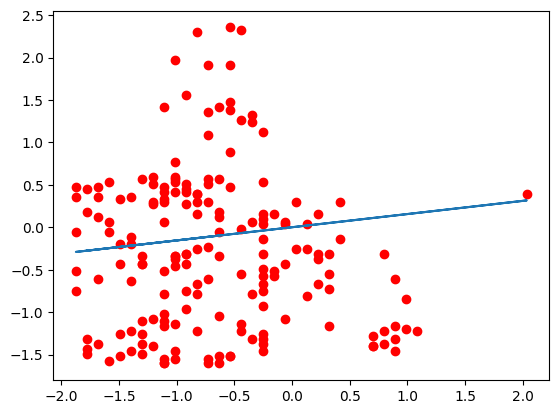

In [24]:
start_time = time.time()
params = reg.train(x, y, epochs=200, learning_rate=0.225)
end_time = time.time()
time_taken_numpy3 = end_time - start_time
numpy_time_list.append(time_taken_numpy3)

print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])

[0.15523802] 1.9983045628457614e-17


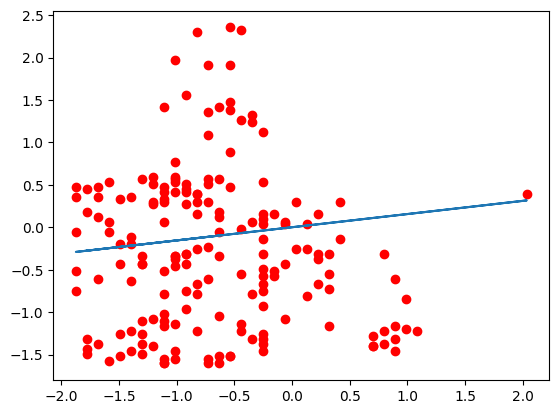

In [25]:
start_time = time.time()
params = reg2.train(x, y, epochs=200, learning_rate=0.225)
end_time = time.time()
time_taken_torch3 = end_time - start_time
torch_time_list.append(time_taken_torch3)

print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg2.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])

[0.15523802] 1.846290390636433e-17


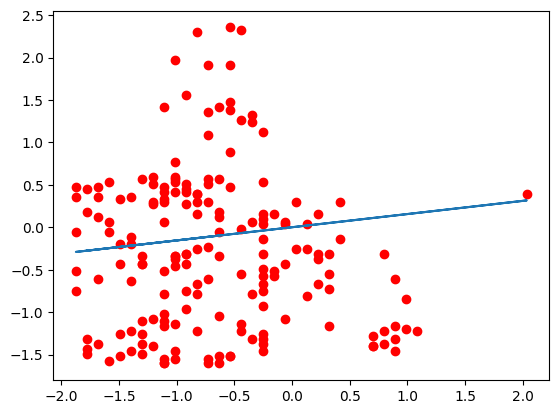

In [26]:
start_time = time.time()
params = reg3.train(x, y, epochs=200, learning_rate=0.225)
end_time = time.time()
time_taken_listas3 = end_time - start_time
listas_time_list.append(time_taken_listas3)

print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg3.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])

In [27]:
print(numpy_time_list)
print(listas_time_list)
print(torch_time_list)

[0.01802825927734375, 0.018523216247558594, 0.016689777374267578]
[0.05347084999084473, 0.059747934341430664, 0.09710288047790527]
[0.052145957946777344, 0.0613856315612793, 0.07724738121032715]


In [28]:
k_values = [1,2,3]
time_data = {
  "Numpy Implementation": numpy_time_list,
  "Lista Implementation": listas_time_list,
  "Torch Implementation": torch_time_list
}
pd.DataFrame(time_data, index = k_values)

,Numpy Implementation,Lista Implementation,Torch Implementation
1,0.018028,0.053471,0.052146
2,0.018523,0.059748,0.061386
3,0.016690,0.097103,0.077247
